# Lecture 5
- HW3 posted, but not due until 2 weeks later (Feb. 8th)
- First exam next Tuesday (February. 3rd)
- The exam scope will be disclosed next lecture, with detail and rules
- The exam scope is defined using lecture notes
## Meshgrid

In [1]:
import numpy as np

In [3]:
Lx=1.
Ly=2.
n=5
x_array=np.linspace(0,Lx,n,endpoint=True)
y_array=np.linspace(0,Ly,n,endpoint=True)

In [4]:
print(x_array)

[0.   0.25 0.5  0.75 1.  ]


In [5]:
Lz = 3
z_array = np.linspace(0,Lz,n,endpoint=True)

In [6]:
x,y,z = np.meshgrid(x_array, y_array, z_array)

In [7]:
print(x_array.shape, x.shape)

(5,) (5, 5, 5)


In [8]:
T = (x+2*y)*z

In [9]:
print(T)

[[[ 0.      0.      0.      0.      0.    ]
  [ 0.      0.1875  0.375   0.5625  0.75  ]
  [ 0.      0.375   0.75    1.125   1.5   ]
  [ 0.      0.5625  1.125   1.6875  2.25  ]
  [ 0.      0.75    1.5     2.25    3.    ]]

 [[ 0.      0.75    1.5     2.25    3.    ]
  [ 0.      0.9375  1.875   2.8125  3.75  ]
  [ 0.      1.125   2.25    3.375   4.5   ]
  [ 0.      1.3125  2.625   3.9375  5.25  ]
  [ 0.      1.5     3.      4.5     6.    ]]

 [[ 0.      1.5     3.      4.5     6.    ]
  [ 0.      1.6875  3.375   5.0625  6.75  ]
  [ 0.      1.875   3.75    5.625   7.5   ]
  [ 0.      2.0625  4.125   6.1875  8.25  ]
  [ 0.      2.25    4.5     6.75    9.    ]]

 [[ 0.      2.25    4.5     6.75    9.    ]
  [ 0.      2.4375  4.875   7.3125  9.75  ]
  [ 0.      2.625   5.25    7.875  10.5   ]
  [ 0.      2.8125  5.625   8.4375 11.25  ]
  [ 0.      3.      6.      9.     12.    ]]

 [[ 0.      3.      6.      9.     12.    ]
  [ 0.      3.1875  6.375   9.5625 12.75  ]
  [ 0.      3.375   6.75

You can use mesh grid to calculate disdances at a whole bunch of different velocities and accelerations.

In [10]:
def position(t, x0, v, a):
    position = x0+v*t+a*t**2/2
    return position

In [11]:
num = 20
t_list = np.linspace(0,10,100)
v_list = np.linspace(0,10,num)
a_list = np.linspace(0,1,num)

In [12]:
print(t_list.shape, v_list.shape, a_list.shape)

(100,) (20,) (20,)


In [13]:
t,v,a = np.meshgrid(t_list, v_list, a_list)

In [14]:
print(t.shape, v.shape,a.shape)

(20, 100, 20) (20, 100, 20) (20, 100, 20)


In [15]:
final_d = position(t, 0, v, a)

In [17]:
print(final_d.shape)

(20, 100, 20)


We can index our meshgrid output, in a way that we have part of it fixed, and we are interested in how things vary along the unfixed dimension.

for exampe, I can fix my velocity and acceleration, and only look at time, this tells me how far my object moved given a fixed velocity and acceleration.

Without constraints: f(v, t, a)
With constraints: f(v=v1, t, a=a2) -> f(t)

v1 is the velocity at index 1 (v_list[1])

a2 is the acceleration at index 2 (a_list[2])

In [19]:
print(final_d[1,:,2].shape)

(100,)


In [20]:
print(v_list[1])

0.5263157894736842


What if I am interested in f(t) when my v and a are both 0?
v = 0 at index 0
a = 0 at index 0

In [22]:
print(final_d[0,:,0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


We can use for loop to plot how final_d varies at the combination of different velocity and different accelecration

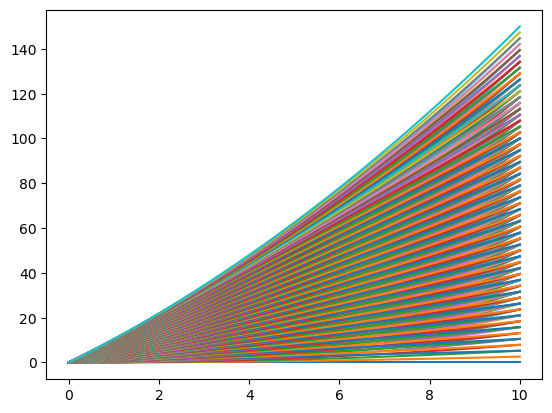

In [30]:
import matplotlib.pyplot as plt
for i in range(num):
    for j in range(num):
        # if j == 19: # I'm using an if loop to control which acceleration I want to print out
            plt.plot(t_list, final_d[i,:,j])
        

## Expand Dims
You can use the numpy expand_dims command to achieve something similar to meshgrid

In [31]:
Lx=1
Ly=2
n = 100
x_array2 = np.linspace(0, Lx, n)
y_array2 = np.linspace(0, Ly, n)

In [32]:
print(x_array2.shape, y_array2.shape)

(100,) (100,)


We can now expand the dimension of these arrays so that they have two dimensions)

In [33]:
print(x_array2.shape)
X2 = np.expand_dims(x_array2, axis=0)
print(X2.shape)

(100,)
(1, 100)


In [35]:
print(x_array2)
print(X2)

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

In [36]:
print(y_array2.shape)
Y2 = np.expand_dims(y_array2, axis=1)
print(Y2.shape)

(100,)
(100, 1)


In [38]:
Z = X2*Y2

In [39]:
print(Z.shape)

(100, 100)


In [46]:
print("Z:",Z[:3,:3])
print("X:",X2[0,:3].shape)
print("Y:",Y2[:3,0].shape)

Z: [[0.         0.         0.        ]
 [0.         0.00020406 0.00040812]
 [0.         0.00040812 0.00081624]]
X: (3,)
Y: (3,)


One thing that expand_dim doesn't work well is when you want to make a contour plot

TypeError: Shapes of x (1, 100) and z (100, 100) do not match

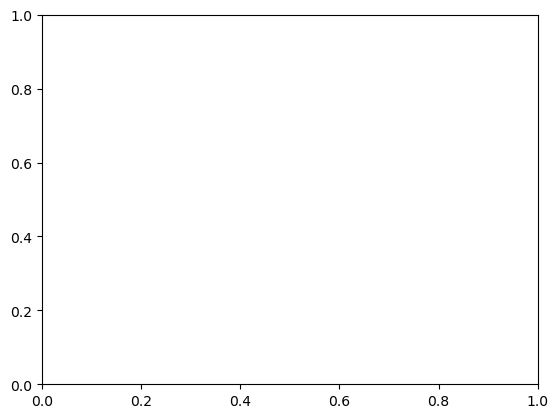

In [44]:
plt.contour(X2,Y2,Z)

## Numpy random numbers
you can use numpy to generate random numbers, and those are very useful for many tasks

In [49]:
a = np.random.randn(10) # randn means I want to generate an array of random numbers instead of just one
b = np.random.randn(10)

I can use the logical operator I learned to compare two arrays
- compare element-by-element in a and be
- is a[0]<b[0]? if so True, otherwise False
- is a[1]<b[1]? if so True, otherwise False
- ......
- return an array of True, False

In [51]:
print(a)
print(b)
print(a<b)

[-1.77526358 -0.40643056  0.7030004  -0.15042575  1.72482255  0.28576471
 -0.15139503 -1.14497659 -0.41195827 -1.08450988]
[-0.27595796 -0.49292026 -0.69376401  1.73080358  1.07545185  0.23398287
  1.14988888  0.91442699  0.27221962 -0.77810139]
[ True False False  True False False  True  True  True  True]


so now let's say I want to return a^2 if a>b and b^2 if b>=a:

In [52]:
if a<b:
    print(a**2)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

We can use a for loop to get around this

In [53]:
c = a<b #boolean array: array of true or false
out1 = np.zeros(len(a))
for i in range(len(a)):
    if c[i]:
        out1[i] = a[i]**2
    else:
        out1[i] = b[i]**2
print(out1)

[3.1515608  0.24297038 0.48130851 0.02262791 1.15659667 0.05474798
 0.02292045 1.3109714  0.16970962 1.17616168]


Now we can consider how to improve it, for example using enumerate

In [54]:
c = a<b #boolean array: array of true or false
out2 = np.zeros(len(a))
for i, item in enumerate(c):
    if item:
        out2[i] = a[i]**2
    else:
        out2[i] = b[i]**2
print(out1)
print(out2)

[3.1515608  0.24297038 0.48130851 0.02262791 1.15659667 0.05474798
 0.02292045 1.3109714  0.16970962 1.17616168]
[3.1515608  0.24297038 0.48130851 0.02262791 1.15659667 0.05474798
 0.02292045 1.3109714  0.16970962 1.17616168]


We can also do this even simpler without for loop, using pure numpy array operation.
- The key logic is that: we can use this boolean array (c) as an index to the numpy array

In [55]:
c = a<b
print(c)

[ True False False  True False False  True  True  True  True]


In [58]:
print(a.shape)
a[c].shape

(10,)


(6,)

In [59]:
out3 = np.zeros(len(a))
print(out3)
out3[c] = a[c]**2
print(out3)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[3.1515608  0.         0.         0.02262791 0.         0.
 0.02292045 1.3109714  0.16970962 1.17616168]


not_c can be obtained from 1-c because:
- True is 1 and False is 0
- 1-True -> 1-1 -> 0 -> False
- 1-False -> 1-0 -> 1 -> True

In [70]:
c = a<b
out3 = np.zeros(len(a))
out3[c] = a[c]**2 
print(out3)
not_c = (1-c).astype(bool)
out3[not_c] = b[not_c]**2
print(out3)

[3.1515608  0.         0.         0.02262791 0.         0.
 0.02292045 1.3109714  0.16970962 1.17616168]
[3.1515608  0.24297038 0.48130851 0.02262791 1.15659667 0.05474798
 0.02292045 1.3109714  0.16970962 1.17616168]
